### TELECOM CHURN 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.

Retaining high profitable customers is the main business goal here.

##### DATA DICTIONARY 

#### Acronyms   
- CIRCLE_ID - Telecom circle area to which the customer belongs to
- LOC - Local calls  within same telecom circle
- STD - STD calls  outside the calling circle
- IC - Incoming calls
- OG - Outgoing calls
- T2T - Operator T to T ie within same operator mobile to mobile
- T2M - Operator T to other operator mobile
- T2O - Operator T to other operator fixed line
- T2F - Operator T to fixed lines of T
- T2C - Operator T to its own call center
- ARPU - Average revenue per user
- MOU - Minutes of usage  voice calls
- AON - Age on network  number of days the customer is using the operator T network
- ONNET - All kind of calls within the same operator network
- OFFNET - All kind of calls outside the operator T network
- ROAM - Indicates that customer is in roaming zone during the call
- SPL - Special calls
- ISD - ISD calls
- RECH - Recharge
- NUM - Number
- AMT - Amount in local currency
- MAX - Maximum
- DATA - Mobile internet
- 3G - G network
- AV - Average
- VOL - Mobile internet usage volume in MB
- 2G - G network
- PCK - Prepaid service schemes called  PACKS
- NIGHT - Scheme to use during specific night hours only
- MONTHLY - Service schemes with validity equivalent to a month
- SACHET - Service schemes with validity smaller than a month
- *.6 - KPI for the month of June
- *.7 - KPI for the month of July
- *.8 - KPI for the month of August
- FB_USER - Service scheme to avail services of Facebook and similar social networking sites
- VBC - Volume based cost  when no specific scheme is not purchased and paid as per usage



In [ ]:
# #missing value inmpute
# #feature important 
# -----10---
# #correlation analysis using plots
# # advance analysis heat and histogram 
# #feature engnieering one var->another
# #var transformation 
# --------30-----------
# ##more than one model 
# ## cros vali
# #hyperparam tuning and scaling 
# #choose the best model 
# #relavnt evalution methods calculated
# --------- 35----------
# ##readibility and effecint code

##### IGNORE WARNINGS

In [170]:
import warnings
warnings.filterwarnings(action='ignore')

##### IMPORT LIBRARIES

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### IMPORTING & READING THE DATASET

In [172]:
# Importing dataset
data = pd.read_csv('Dataset/train.csv')
 
##copy data
data_copy=data

# To display maximum rows and columns
pd.set_option('max_columns',None)
pd.set_option('max_rows',None)

### CREATING REQUIRED FUNCTIONS

In [173]:
# To find number of rows and cols
def num_rows(data):
    rows, columns = data.shape
    print(f'The dataset has {rows} rows and {columns} columns')

# To find percentage missing values
def percentage_missing(data):
    print('\nPERCENTAGE MISSING VALUES:')
    c=0
    for feature in data:
        if data[feature].isnull().sum()!=0:
            print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        else:
            c+=1
    if c == len(data.columns):print('There is no missing values in the dataset')
    print("\n")
def make_unique_dist_list(data):
# CHECKING THE UNIQUE AND DISTINCT VARIABLE
    rm_lst = []
    for i in data.columns:
        if data[i].nunique() in (1, 69999) and i!='churn_probability':
            print(i, data[i].nunique(), sep = ' --> ')
            rm_lst.append(i)
    return rm_lst
def remove_var_rmlist(rmlist,data):
# REMOVING THE ABOVE VARIABLE
    for i in rm_lst:
        del data[i]
    return data


### NUMBER OF ROWS AND COLS

In [174]:
num_rows(data)

The dataset has 69999 rows and 172 columns


#### NUMBER OF FEATURES

In [175]:
# Looping to find the number of categorical and numerical features
num, obj = 0,0
for feature in data.columns:
    if data.dtypes[feature] != 'O':
        num += 1
    else:
        obj += 1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features.')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 163 numerical features and 9 categorical features.


#### BASIC INFO ON THE DATASET

In [176]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

### Looking for data duplicates

In [177]:
row, column = data[data.duplicated()].shape
print('There are no duplicates in the dataset.' if row==0 else f'There are {row} duplicates in the dataset.')

There are no duplicates in the dataset.


### ANALYSIS ON TARGET VARIABLE

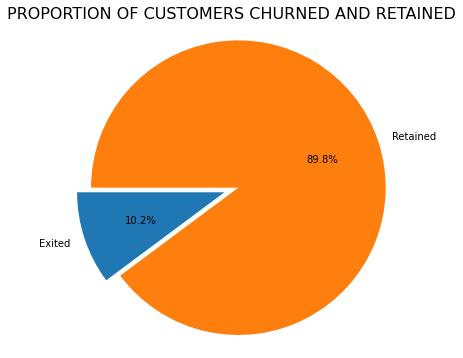

In [178]:
labels = 'Exited', 'Retained'
sizes = [data.churn_probability[data['churn_probability']==1].count(), 
         data.churn_probability[data['churn_probability']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(8, 6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=180)
ax1.axis('equal')
plt.title("PROPORTION OF CUSTOMERS CHURNED AND RETAINED", size = 16)
plt.show()

#### DATA TREATMENT 

###  Removing features which has one unique and all distinct value

In [179]:
# def remove_var_rmlist(rmlist,data)
# # REMOVING THE ABOVE VARIABLE
#     for i in rm_lst:
#         del data[i]
rm_lst=make_unique_dist_list(data)
remove_var_rmlist(rm_lst,data)
# DATA DIMENSION AFTER REMOVAL
num_rows(data)

id --> 69999
circle_id --> 1
loc_og_t2o_mou --> 1
std_og_t2o_mou --> 1
loc_ic_t2o_mou --> 1
last_date_of_month_6 --> 1
last_date_of_month_7 --> 1
last_date_of_month_8 --> 1
std_og_t2c_mou_6 --> 1
std_og_t2c_mou_7 --> 1
std_og_t2c_mou_8 --> 1
std_ic_t2o_mou_6 --> 1
std_ic_t2o_mou_7 --> 1
std_ic_t2o_mou_8 --> 1
The dataset has 69999 rows and 158 columns


### MISSING VALUE TREATMENT

In [180]:
# Finding the percentage missing values in the dataset
percentage_missing(data)


PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2m_mou_8' has 5.29% missing values
The featu

In [181]:
print('\nLESS THAN 40% MISSING VALUES IMPUTATION')
rm_lst = []

for i in data.columns:
    if data[i].isnull().mean()*100 > 40.0 :
        rm_lst.append(i)

print(rm_lst)
print(len(rm_lst))    


LESS THAN 40% MISSING VALUES IMPUTATION
['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
30


In [182]:
### Removing columns more than 50% null values
for feature in rm_lst:
    del data[feature]

In [183]:
num_rows(data)
percentage_missing(data)

The dataset has 69999 rows and 128 columns

PERCENTAGE MISSING VALUES:
The feature 'onnet_mou_6' has 3.95% missing values
The feature 'onnet_mou_7' has 3.84% missing values
The feature 'onnet_mou_8' has 5.29% missing values
The feature 'offnet_mou_6' has 3.95% missing values
The feature 'offnet_mou_7' has 3.84% missing values
The feature 'offnet_mou_8' has 5.29% missing values
The feature 'roam_ic_mou_6' has 3.95% missing values
The feature 'roam_ic_mou_7' has 3.84% missing values
The feature 'roam_ic_mou_8' has 5.29% missing values
The feature 'roam_og_mou_6' has 3.95% missing values
The feature 'roam_og_mou_7' has 3.84% missing values
The feature 'roam_og_mou_8' has 5.29% missing values
The feature 'loc_og_t2t_mou_6' has 3.95% missing values
The feature 'loc_og_t2t_mou_7' has 3.84% missing values
The feature 'loc_og_t2t_mou_8' has 5.29% missing values
The feature 'loc_og_t2m_mou_6' has 3.95% missing values
The feature 'loc_og_t2m_mou_7' has 3.84% missing values
The feature 'loc_og_t2

#### Removing date columns as it has no relavant to ten analysis being done

In [184]:
# List the date columns
date_cols = [date for date in data.columns.to_list() if 'date' in date]
print(date_cols) 
for feature in date_cols:
    del data[feature]

['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8']


In [185]:
for feature in data:
    if data[feature].isnull().sum()!=0:
        #print(f"The feature '{feature}' has {np.round((data[feature].isnull().mean()*100),2)}% missing values")
        data=data[~np.isnan(data[feature])]
    

In [186]:
num_rows(data)

The dataset has 63842 rows and 125 columns


In [187]:
# create a new colulmn, which would be average  of 6th & 7th months
# lets first create list of columns belonging to 6th and 7th months
col_list = data.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()
print(col_list)
print (data.shape)

# lets take the average now
for idx, col in enumerate(col_list.unique()):
    avg_col_name = "avg_"+col+"_av67" # lets create the column name dynamically
    col_6 = col+"_6"
    col_7 = col+"_7"
    data[avg_col_name] = (data[col_6] + data[col_7])/ 2

Index(['arpu', 'arpu', 'onnet_mou', 'onnet_mou', 'offnet_mou', 'offnet_mou',
       'roam_ic_mou', 'roam_ic_mou', 'roam_og_mou', 'roam_og_mou',
       'loc_og_t2t_mou', 'loc_og_t2t_mou', 'loc_og_t2m_mou', 'loc_og_t2m_mou',
       'loc_og_t2f_mou', 'loc_og_t2f_mou', 'loc_og_t2c_mou', 'loc_og_t2c_mou',
       'loc_og_mou', 'loc_og_mou', 'std_og_t2t_mou', 'std_og_t2t_mou',
       'std_og_t2m_mou', 'std_og_t2m_mou', 'std_og_t2f_mou', 'std_og_t2f_mou',
       'std_og_mou', 'std_og_mou', 'isd_og_mou', 'isd_og_mou', 'spl_og_mou',
       'spl_og_mou', 'og_others', 'og_others', 'total_og_mou', 'total_og_mou',
       'loc_ic_t2t_mou', 'loc_ic_t2t_mou', 'loc_ic_t2m_mou', 'loc_ic_t2m_mou',
       'loc_ic_t2f_mou', 'loc_ic_t2f_mou', 'loc_ic_mou', 'loc_ic_mou',
       'std_ic_t2t_mou', 'std_ic_t2t_mou', 'std_ic_t2m_mou', 'std_ic_t2m_mou',
       'std_ic_t2f_mou', 'std_ic_t2f_mou', 'std_ic_mou', 'std_ic_mou',
       'total_ic_mou', 'total_ic_mou', 'spl_ic_mou', 'spl_ic_mou',
       'isd_ic_mou', 'isd

In [188]:
# we dont need columns from which we have derived new features, we will drop those columns
num_rows(data)
col_to_drop = data.filter(regex='_6|_7').columns
data.drop(col_to_drop, axis=1, inplace=True)

num_rows(data)
data.columns

The dataset has 63842 rows and 165 columns
The dataset has 63842 rows and 85 columns


Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'std_og_mou_8', 'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8',
       'total_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8',
       'total_ic_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8',
       'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_8',
       'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_8',
       'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability', 'avg_arpu_av67',
       'avg_onnet_mou_av67', 'avg_offnet_mou_av67', 'avg_roam_ic_mou_av67',
       'avg_roam_og_mou_av67', 'avg_loc_og_t2

In [189]:
target=[]
for var in data.columns:
    if  1.*data[var].nunique()/data[var].count() <= 0.05:
        target.append(var)
print(f'Length of selected columns for analysis {len(target)}')      

Length of selected columns for analysis 27


##### UNIVARIATE ANALYSIS

In [21]:
# target_col = list(data.columns)
# a = 50  # number of rows
# b = 2 # number of columns
# c = 1  # initialize plot counter
# #target_col=[]


        
# fig = plt.figure(figsize=(26,10))
# fig.set_size_inches(35, 200)

# for i in target:

#     if c!=21:
#         plt.subplot(a, b, c)
#         plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
#         plt.xlabel(i)
#         sns.histplot(data[i])
#         c = c + 1
        
      
    
# plt.tight_layout()
# plt.show();

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000017B3DEBD040> (for post_execute):


KeyboardInterrupt: 

In [ ]:
# target_col = list(data.columns)
# a = 50  # number of rows
# b = 2  # number of columns
# c = 1  # initialize plot counter
# #target_col=[]


        
# fig = plt.figure(figsize=(26,30))
# fig.set_size_inches(35, 200)

# for i in target:

#     if c!=150:
#         plt.subplot(a, b, c)
#         plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
#         plt.xlabel(i)
#         sns.distplot(data[i], color='black')
#         c = c + 1
#         #print(c)
      
    
# plt.tight_layout()
# plt.show();

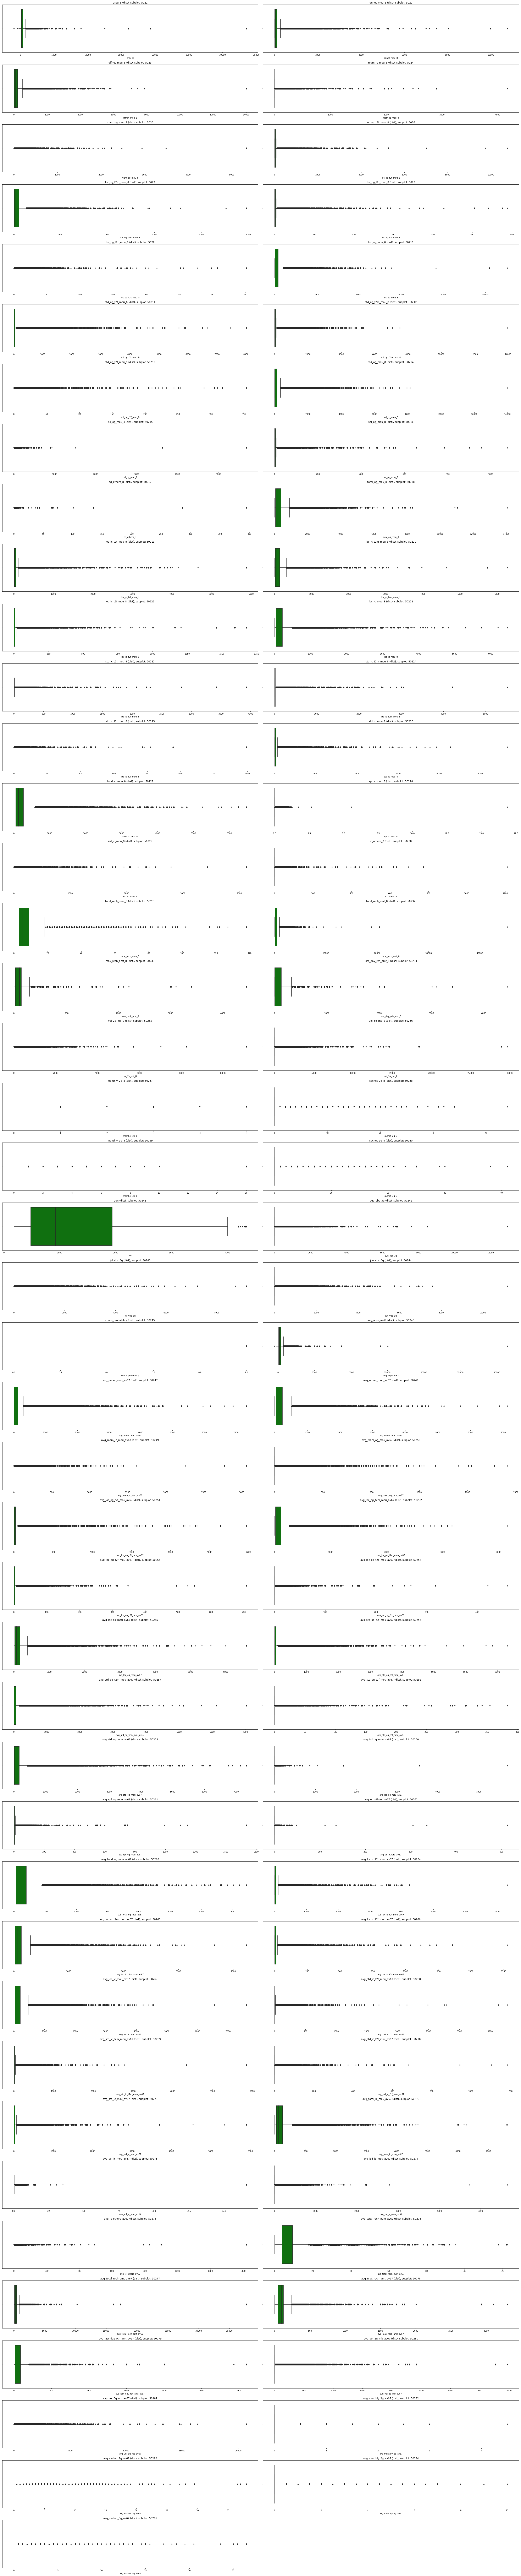

In [190]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(x=data[i],color='green')
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

##### MULTIVARIATE ANALYSIS

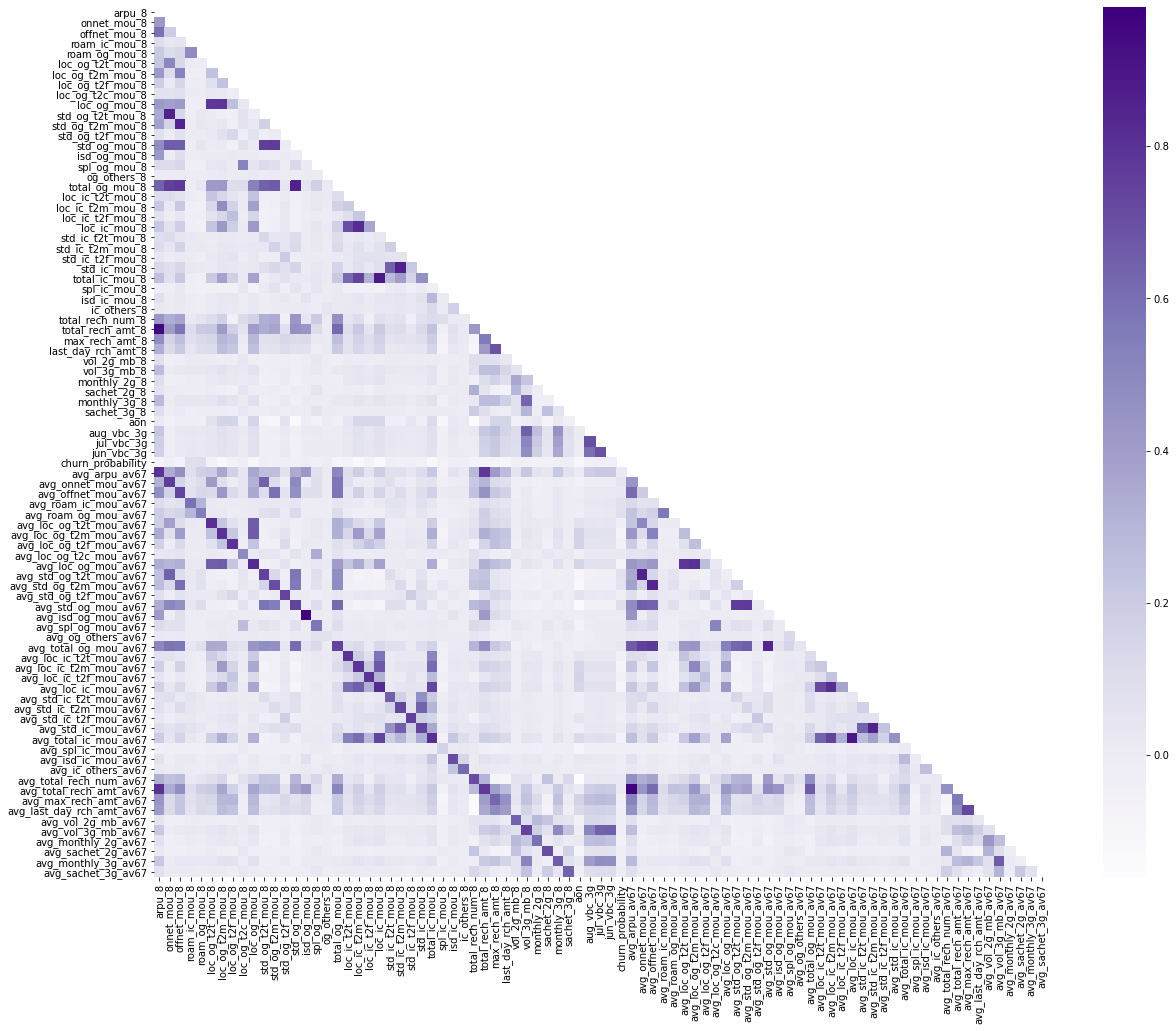

In [191]:
##create heat map
corr = data.corr()
mask = np.triu(corr)
plt.figure(figsize=(20,16))
sns.heatmap(corr, 
            annot=False , 
            fmt='.2f', 
            mask=mask, 
            cmap='Purples')
plt.show()

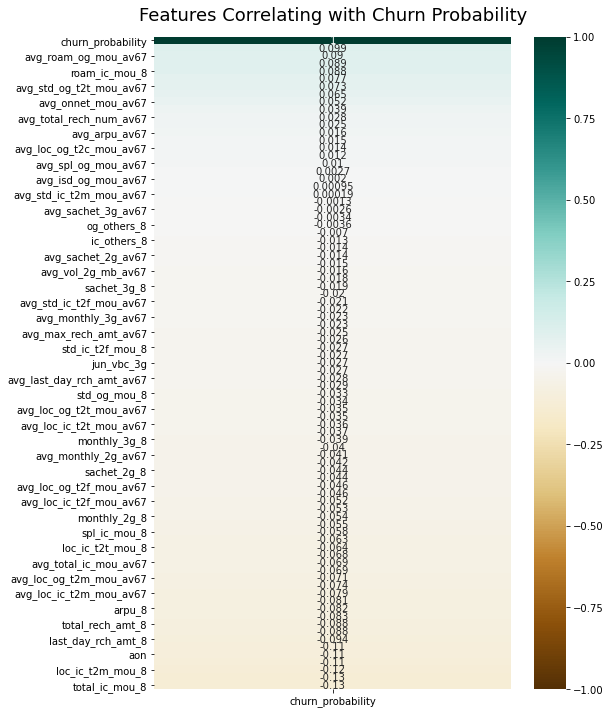

In [192]:
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(data.corr()[['churn_probability']].sort_values(by='churn_probability', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Churn Probability', fontdict={'fontsize':18}, pad=16);

##### BIVARIATE ANALYSIS

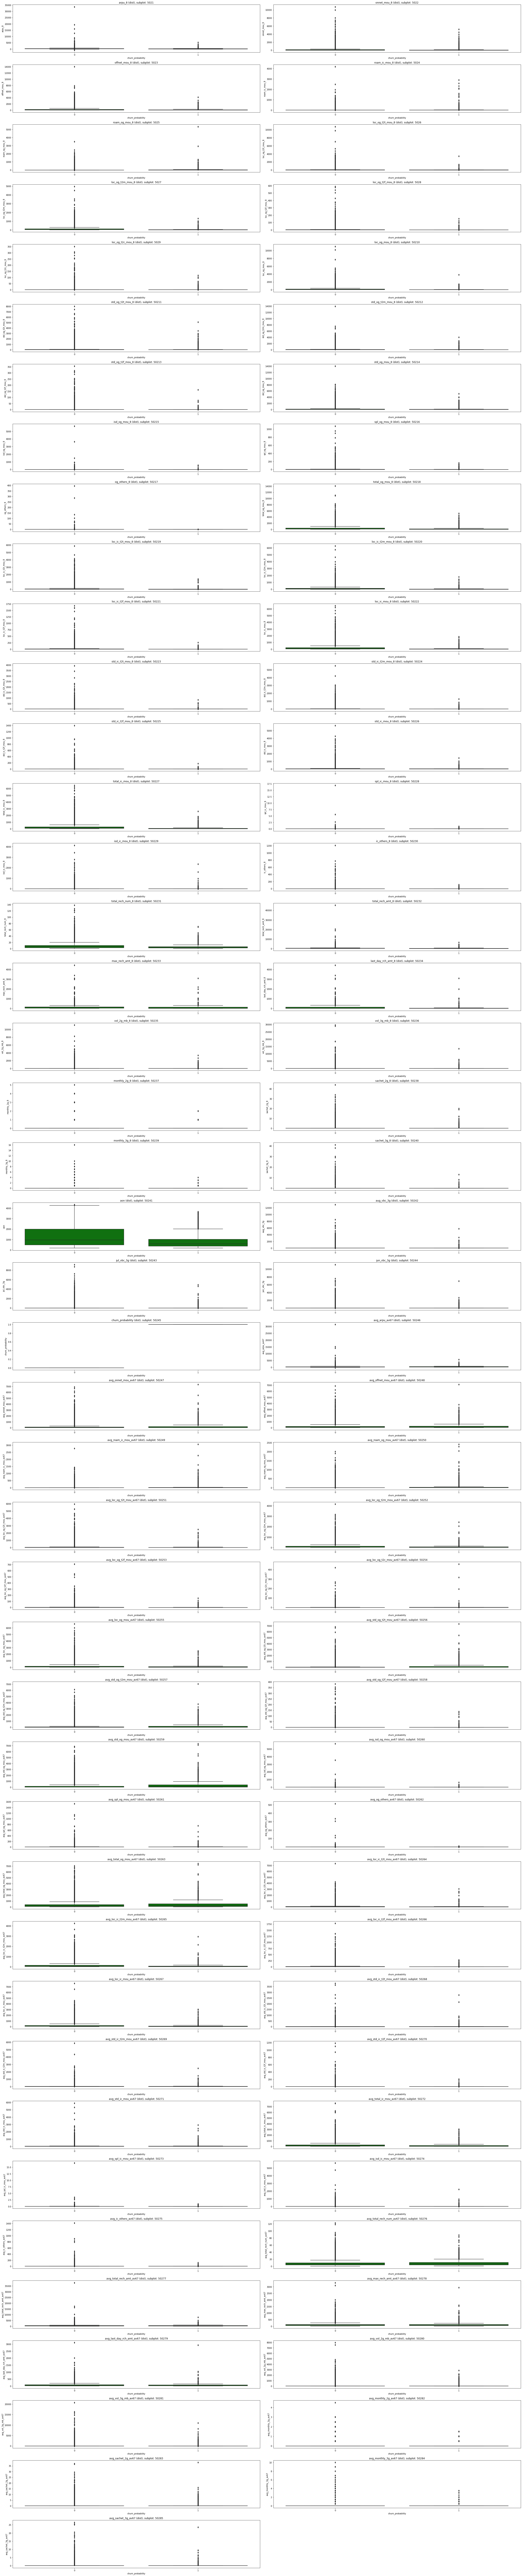

In [193]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        sns.boxplot(x = data.churn_probability,y=data[i],color='green')
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

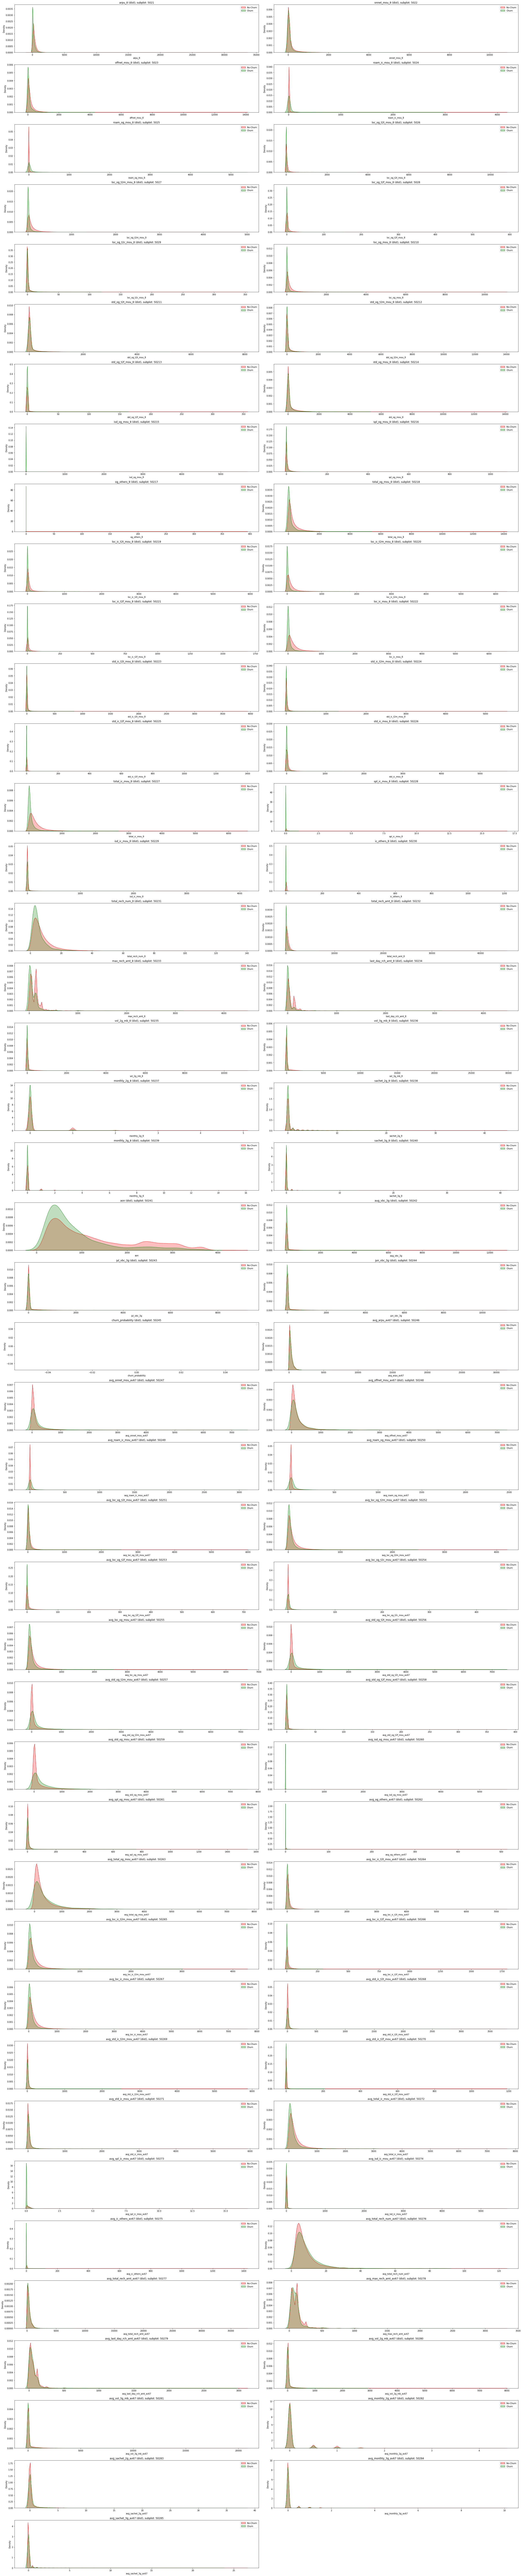

In [194]:
target_col = list(data.columns)
a = 50  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
#target_col=[]


        
fig = plt.figure(figsize=(26,30))
fig.set_size_inches(35, 200)

for i in target_col:

    if c!=150:
        plt.subplot(a, b, c)
        plt.title('{} (dist), subplot: {}{}{}'.format(i, a, b, c))
        plt.xlabel(i)
        # churn Vs Base Cost
        ax = sns.kdeplot(data[i][(data["churn_probability"] == 0)],
                color="Red", shade = True)
        ax = sns.kdeplot(data[i][(data["churn_probability"] == 1)],
                ax =ax, color="Green", shade= True)
        ax.legend(["No-Churn","Churn"],loc='upper right')
       
        c = c + 1
        #print(c)
      
    
plt.tight_layout()
plt.show();

###### Remove target col from feature dataframe

In [195]:
X = data.drop(['churn_probability'], axis=1)
y = data['churn_probability']

data.drop('churn_probability', axis=1, inplace=True)

In [196]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [197]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (44689, 84)
Dimension of X_test: (19153, 84)


##### WITHOUT PCA 

##### LOGISTIC REGRESSION WITH RFE 

In [204]:
def resample(X_train,y_train):
    from imblearn.over_sampling import RandomOverSampler
    over_sampler = RandomOverSampler(random_state=42)
    #sm = SMOTE(random_state=42)
    X_r, y_r = over_sampler.fit_resample(X_train, y_train)
    return X_r,y_r

In [205]:
def RFELinear(X_train,y_train,X_test,y_test):
    X_r,y_r=resample(X_train,y_train)
    lr = LogisticRegression()
    metric_rfelr=[]
    rfe = RFE(lr,n_features_to_select=15)   
    rfe = rfe.fit(X_r, y_r)
    rfe_features = list(data.columns[rfe.support_])
    print("15 most important features selected by RFE ", rfe_features)
    X_rfe = pd.DataFrame(data=X_r).iloc[:, rfe.support_]
    y_rfe = y_r
    ##logistic on rfe 
    lr.fit(X_rfe, y_rfe)
    X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

    y_pred = lr.predict(X_test_rfe)
    y_pred_train = lr.predict(X_rfe)
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    print('Accuracy on the test dataset:',lr.score(X_test_rfe, y_test))
    print('Accuracy on the train dataset:',lr.score(X_rfe, y_rfe))
    from sklearn.metrics import f1_score
    core=f1_score(y_test, y_pred, average="weighted")
    print('F1 score:  ',core)
    metric_rfelr.append(round(lr.score(X_test_rfe, y_test),2))
    metric_rfelr.append(round(lr.score(X_rfe, y_rfe),2))
    metric_rfelr.append(core)
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    return lr,metric_rfelr
    

In [206]:
lr,metric_rfelr=RFELinear(X_train,y_train,X_test,y_test)

15 most important features selected by RFE  ['roam_og_mou_8', 'loc_og_t2m_mou_8', 'og_others_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_amt_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'aon', 'avg_arpu_av67', 'avg_total_ic_mou_av67', 'avg_total_rech_amt_av67']
[[13306  4665]
 [  208   974]]
Accuracy on the test dataset: 0.7455751057275622
Accuracy on the train dataset: 0.7778424755204867
F1 score:   0.8106905496491783
              precision    recall  f1-score   support

           0       0.98      0.74      0.85     17971
           1       0.17      0.82      0.29      1182

    accuracy                           0.75     19153
   macro avg       0.58      0.78      0.57     19153
weighted avg       0.93      0.75      0.81     19153



#### RANDOM FORREST

In [133]:
def RandomForest(X_train,y_train,X_test,y_test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    metric_random=[]
    model_rf = RandomForestClassifier()
    model_rf.fit(X_train, y_train)

    # Make predictions
    from sklearn.metrics import confusion_matrix
    confusion_matrix = confusion_matrix(y_test, y_pred)
    print(confusion_matrix)
    prediction_test = model_rf.predict(X_test)
    prediction_train = model_rf.predict(X_train)
    print ('Randon Forest Accuracy with Default Hyperparameter test',metrics.accuracy_score(y_test, prediction_test))
    print ('Randon Forest Accuracy with Default Hyperparameter train',metrics.accuracy_score(y_train, prediction_train))
    from sklearn.metrics import f1_score
    core=f1_score(y_test, prediction_test, average="weighted")
    print('F1 score:  ',core)
    metric_random.append(round(metrics.accuracy_score(y_test, prediction_test),2))
    metric_random.append(round(metrics.accuracy_score(y_train, prediction_train),2))
    metric_random.append(core)
    from sklearn.metrics import classification_report
    print(classification_report(y_test, prediction_test))
    return model_rf,metric_random

In [134]:
model_random,metric_random=RandomForest(X_train,y_train,X_test,y_test)

[[17703   268]
 [  788   394]]
Randon Forest Accuracy with Default Hyperparameter test 0.949146347830627
Randon Forest Accuracy with Default Hyperparameter train 0.9999552462574682
F1 score:   0.9409524839680549
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17971
           1       0.60      0.33      0.43      1182

    accuracy                           0.94     19153
   macro avg       0.78      0.66      0.70     19153
weighted avg       0.94      0.94      0.94     19153



##### ADABOOST  ALGORITHM 

In [110]:
def Adaboost(X_train,y_train,X_test,y_test):
    from sklearn.ensemble import AdaBoostClassifier
    adaboost =  AdaBoostClassifier(n_estimators=200, random_state=1)
    #Fitting Model
    metric_ada=[]
    adaboost.fit(X_train, y_train)
    #pred
    y_pred = adaboost.predict(X_test)
    y_pred_train = adaboost.predict(X_train)
    print('Accuracy of test model is:  ',metrics.accuracy_score(y_test, y_pred))
    print('Accuracy of train model is:  ',metrics.accuracy_score(y_train, y_pred_train))
    #Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred)
    print('The confusion Matrix : \n',cm)
    from sklearn.metrics import f1_score
    core=f1_score(y_test, prediction_test, average="weighted")
    print('F1 score:  ',core)
    metric_ada.append(round(metrics.accuracy_score(y_test, y_pred),2))
    metric_ada.append(round(metrics.accuracy_score(y_train, y_pred_train),2))
    metric_ada.append(core)
    from sklearn.metrics import classification_report
    print(classification_report(y_test, y_pred))
    return adaboost,metric_ada

AdaBoostClassifier(n_estimators=200, random_state=1)

In [207]:
adaboost,metric_ada=Adaboost(X_train,y_train,X_test,y_test)

Accuracy of test model is:   0.9448650341982979
Accuracy of train model is:   0.9508156369576406
The confusion Matrix : 
 [[17703   268]
 [  788   394]]
F1 score:   0.9411319283416063
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17971
           1       0.60      0.33      0.43      1182

    accuracy                           0.94     19153
   macro avg       0.78      0.66      0.70     19153
weighted avg       0.94      0.94      0.94     19153



##### XGBOOST ALGOITHM 

In [210]:
def Xgboost(X_train,y_train,X_test,y_test):
    import xgboost as xgb
    xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
    xgb_cfl.get_params()
    metric_xg=[]
    # Fit the model to our train and target
    xgb_cfl.fit(X_train, y_train)  # default 
    # Get our predictions
    xgb_predictions_test = xgb_cfl.predict(X_test)
    xgb_predictions_train = xgb_cfl.predict(X_train)
    print('Accuracy of test model is:  ',metrics.accuracy_score(y_test, xgb_predictions_test))
    print('Accuracy of train model is:  ',metrics.accuracy_score(y_train, xgb_predictions_train))
    #Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, xgb_predictions_test)
    print('The confusion Matrix : \n',cm)
    from sklearn.metrics import f1_score
    core=f1_score(y_test, xgb_predictions_test, average="weighted")
    print('F1 score:  ',core)
    metric_xg.append(round(metrics.accuracy_score(y_test, xgb_predictions_test),2))
    metric_xg.append(round(metrics.accuracy_score(y_train, xgb_predictions_train),2))
    metric_xg.append(core)
    from sklearn.metrics import classification_report
    print(classification_report(y_test, xgb_predictions_test))
    return xgb_cfl,metric_xg
    

In [212]:
xgb_cfl,metric_xg=Xgboost(X_train,y_train,X_test,y_test)

Accuracy of test model is:   0.9477888581423276
Accuracy of train model is:   0.9878941126451699
The confusion Matrix : 
 [[17711   260]
 [  740   442]]
F1 score:   0.9414817986186327
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17971
           1       0.63      0.37      0.47      1182

    accuracy                           0.95     19153
   macro avg       0.79      0.68      0.72     19153
weighted avg       0.94      0.95      0.94     19153



In [213]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['Score (Test)','Score (Train)',
                       'f1 score'], 
        'Logistic Regression with RFE': metric_rfelr
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Logistic Regression with RFE'] )

ad_metric = pd.Series(metric_ada, name = 'Ada boost')
xg_metric = pd.Series(metric_xg, name = 'Xg Bhoost')
rand_metric = pd.Series(metric_random, name = 'Xg Bhoost')

final_metric = pd.concat([lr_metric, ad_metric, xg_metric,rand_metric], axis = 1)

final_metric

Metric  Logistic Regression with RFE  Ada boost  Xg Bhoost  \
0   Score (Test)                      0.750000   0.940000   0.950000   
1  Score (Train)                      0.780000   0.950000   0.990000   
2       f1 score                      0.810691   0.941132   0.941482   

   Xg Bhoost  
0        NaN  
1        NaN  
2        NaN

#### PCA

In [214]:
# import PCA
from sklearn.decomposition import PCA
pca = PCA(random_state=100)
X_r,y_r=resample(X_train,y_train)
# apply PCA on train data
pca.fit(X_r)

PCA(random_state=100)

In [215]:
X_tr_pca = pca.fit_transform(X_r)
print(X_tr_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(84152, 84)
(19153, 84)


##### LOGISTIC WITH PCA

In [216]:
lr,metric_rfelr=RFELinear(X_tr_pca,y_r,X_test_pca,y_test)

15 most important features selected by RFE  ['onnet_mou_8', 'offnet_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2f_mou_8', 'isd_ic_mou_8', 'last_day_rch_amt_8', 'monthly_3g_8', 'aug_vbc_3g', 'jun_vbc_3g', 'avg_std_ic_t2t_mou_av67', 'avg_std_ic_t2f_mou_av67', 'avg_total_ic_mou_av67', 'avg_spl_ic_mou_av67']
[[13910  4061]
 [  248   934]]
Accuracy on the test dataset: 0.7750221897352895
Accuracy on the train dataset: 0.7818946667934215
F1 score:   0.8311105208148959
              precision    recall  f1-score   support

           0       0.98      0.77      0.87     17971
           1       0.19      0.79      0.30      1182

    accuracy                           0.78     19153
   macro avg       0.58      0.78      0.58     19153
weighted avg       0.93      0.78      0.83     19153



##### RANDOM FOREST BASE MODEL WITH PCA

In [217]:
model_random,metric_random=RandomForest(X_tr_pca,y_r,X_test_pca,y_test)

[[17703   268]
 [  788   394]]
Randon Forest Accuracy with Default Hyperparameter test 0.9447084007727249
Randon Forest Accuracy with Default Hyperparameter train 1.0
F1 score:   0.9329315087922856
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     17971
           1       0.64      0.24      0.35      1182

    accuracy                           0.94     19153
   macro avg       0.79      0.62      0.66     19153
weighted avg       0.93      0.94      0.93     19153



##### ADABOOST WITH PCA

In [220]:
adaboost,metric_ada=Adaboost(X_tr_pca,y_r,X_test_pca,y_test)

KeyboardInterrupt: 

##### XGBOOST WITH PCA

In [221]:
xgb_cfl,metric_xg=Xgboost(X_tr_pca,y_r,X_test_pca,y_test)

Accuracy of test model is:   0.9278442019526967
Accuracy of train model is:   0.9889961022910924
The confusion Matrix : 
 [[17144   827]
 [  555   627]]
F1 score:   0.9312918489474518
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     17971
           1       0.43      0.53      0.48      1182

    accuracy                           0.93     19153
   macro avg       0.70      0.74      0.72     19153
weighted avg       0.94      0.93      0.93     19153

